# Chapter 4: Recursion

## Factorials

In [41]:
def factorial(n):
    if n == 0:
        return 1
    else:
        return n*factorial(n-1)
    
factorial(5)

120

### Time complexity of the Factorial function

```python
    def factorial(n):
    if n == 0: # test: constant time
        return 1 # return value: constant time
    else: # test: constant time
        return n*factorial(n-1) # return value: constant time
```

so each call to the factorial function is $O(1)$, and we see that the function is called $n + 1$ times, counting from $n$, $n-1$ down to $0$.

Hence, overall, the recursive factorial function has $O(n)$ complexity.

## Recursively drawing an English ruler (inches)

In [6]:
# this is a simple function, does not include any recursion
def draw_line(tick_length, tick_label=''):
    """
        Draw one line with given tick length (followed by optional label).
    """
    line = '-' * tick_length
    if tick_label:
        line += ' ' + tick_label
    print(line)

# recursive function, calls itself until centre_length = 1
def draw_interval(centre_length):
    """
        Draw tick interval based upon a central tick length.
    """
    if centre_length > 0: # while centre_length >= 1
        draw_interval(centre_length - 1) # recursively draw ticks above centre tick
        draw_line(centre_length) # draw centre tick
        draw_interval(centre_length - 1) # recursively draw ticks below centre tick
    
# recursive wrapper function for draw_interval
def draw_ruler(num_inches, major_length):
    """
        Draw English ruler with given number of inches,
        major tick length.
    """
    draw_line(major_length, '0') # draw the first major tick with value 0 inches
    for j in range(1, 1 + num_inches): # loop through desired number of inches
        draw_interval(major_length - 1) # draw the interval up to but not including next major tick
        draw_line(major_length, str(j)) # draw the next major tick

In [9]:
draw_ruler(3, 3)

--- 0
-
--
-
--- 1
-
--
-
--- 2
-
--
-
--- 3


### Time complexity of draw_ruler

How many total lines of output are generated by an initial call to `draw_interval(c)`, where `c` denotes the centre length?

This is a reasonable benchmark for overall efficiency of the algorithm as each line of output depends on `draw_line`, which is $O(1)$

#### Proposition

For $c \geq 0$, a call to `draw_interval(c)` results in precisely $2^{c} - 1$ lines of output.

##### Proof by Induction

Calling `draw_interval` where `c=0` produces no output

In [43]:
draw_interval(0)

and $2^{0} - 1 = 1 - 1 = 0$.

More generally, the number of lines printed by `draw_interval(c)` is one more than twice the number generated by a call to `draw_interval(c-1)`, as one centre line is printed between two such recursive calls:

```python
        draw_interval(centre_length - 1)
        draw_line(centre_length)
        draw_interval(centre_length - 1) 
```

Hence, by induction:

$$1 + 2 \cdot (2^{c-1} - 1) = 1 + 2^{c} - 2 = 2^{c}-1$$

## Binary Search

In [34]:
test_array = [1, 3, 4, 5, 7, 12, 15, 20, 21]

def binary_search(data, target, low, high):
    if low > high:
        return False
    else: 
        mid = (low + high) // 2
        
        if target == data[mid]:
            return True
        elif target < data[mid]:
            return binary_search(data, target, low, mid - 1)
        else:
            return binary_search(data, target, mid + 1, high)
        
binary_search(test_array, 5, 0, len(test_array)-1)

True

### Time complexity of Binary Search

#### Proposition

The binary search algorithm runs in $O(\log(n))$ time for a sorted sequence with $n$ elements.

##### Justification

The number of remaining canditdates is reduced by at least one half with each recursive call.

That means, after the first call, the length of the sequence is at most $\frac{n}{2}$, after the second, $\frac{n}{4}$, etc.

Thus, in general, after the $jth$ call to the function, the length of the sequence is at most:

$$\frac{n}{2^{j}}$$


In the worst case, the recursion stops when there are no more candidate entries,

so the maximum number of recursive calls performed is the smallest integer $r$ such that:

$$\frac{n}{2^{r}} < 1$$

and rearranging:

$$r = \log(n) + 1$$

which implies that the binary search runs in $O(\log(n))$ time

## Fibonacci (Good and Bad)

In [74]:
# bad Fibonacci (binary recursion)

def bad_fibonacci(n):
    """
        Return the nth Fibonacci number.
    """
    global call
    
    call += 1
    
    if n <= 1:
        return n
    else:
        return bad_fibonacci(n - 1) + bad_fibonacci(n - 2)
    
bad_fibonacci(5)
call_counts = {}
for i in range(20):
    call = 0
    bad_fibonacci(i)
    call_counts[i] = call
    
print(call_counts)

{0: 1, 1: 1, 2: 3, 3: 5, 4: 9, 5: 15, 6: 25, 7: 41, 8: 67, 9: 109, 10: 177, 11: 287, 12: 465, 13: 753, 14: 1219, 15: 1973, 16: 3193, 17: 5167, 18: 8361, 19: 13529}


/home/jake/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

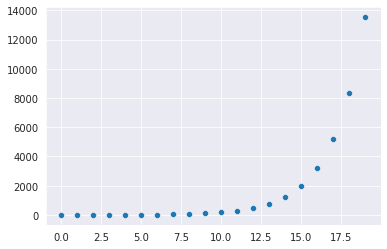

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

sns.scatterplot(call_counts.keys(), call_counts.values())

{0: 1, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19}


/home/jake/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

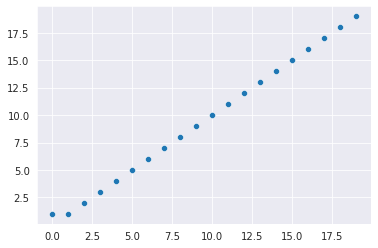

In [79]:
def good_fibonacci(n):
    """
        Return pair of Fibonacci numbers, F(n) and F(n-1)
    """
    global call
    
    call += 1
    if n <= 1:
        return (n, 0)
    else:
        (a, b) = good_fibonacci(n - 1)
        return (a + b, a)
    
call_counts = {}
for i in range(20):
    call = 0
    good_fibonacci(i)
    call_counts[i] = call
    
print(call_counts)

sns.set_style("darkgrid")

sns.scatterplot(call_counts.keys(), call_counts.values())